<a href="https://colab.research.google.com/github/anmol0720/Time-Series-Forcasting/blob/master/Time_Series_Analysis_and_Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
dataframe=pd.read_csv("daily-total-female-births-CA.csv",header=0)

In [315]:
dataframe.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [316]:
#System is treating dates here as objects or strings
dataframe['date'].dtype

dtype('O')

To let the system identify dates as dates

In [0]:
#[0] because we have date at our first column
df2=pd.read_csv("daily-total-female-births-CA.csv",header=0,parse_dates=[0])

In [318]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [319]:
df2['date'].dtype
#Here we see that now the system identifies dates in date formate

dtype('<M8[ns]')

#Load Data as Series
We need to make the date time column as our index column

In [0]:
series=dataframe=pd.read_csv("daily-total-female-births-CA.csv",header=0,parse_dates=[0],index_col=0,squeeze=True)

In [321]:
#Here we get the series name as birth
series.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

##Exploring Time Series Data

In [322]:
series.shape

(365,)

In [323]:
df2.shape

(365, 2)

##Quering by Time
By using Series

In [324]:
print(series['1959-01'])

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: births, dtype: int64


By using Dataframe

In [325]:
df2[(df2['date']>'1959-01-01')&(df2['date']<'1959-01-21')]

,date,births
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27
10,1959-01-11,38


Statistical Description

In [326]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [327]:
df2.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


#Time Series Data Visualization

Line Chart

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
df3=df2.copy()

In [330]:
df3.head(10)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


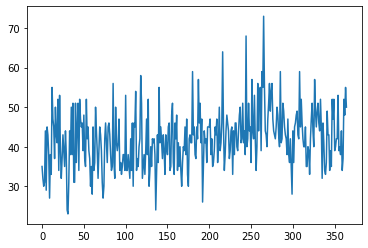

In [331]:
#We get index value at X-axis in the following plot
df3['births'].plot()

In [0]:
#Now to get index as date
df3.index=df3['date']

In [333]:
df3.head(10)

,date,births
date,,
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38


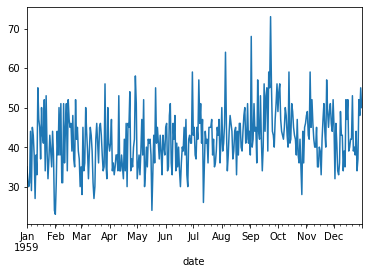

In [334]:
#We get a date in the X-axis
df3['births'].plot()

##Zooming In

In [0]:
df4=df3[(df3['date']>'1959-01-01')&(df3['date']<'1959-01-10')]

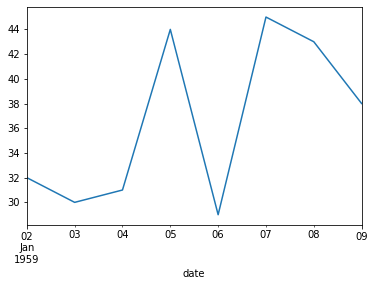

In [336]:
df4['births'].plot()

Trendlines

In [0]:
import seaborn as sns

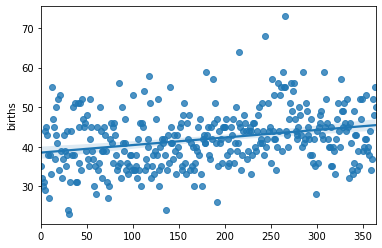

In [338]:
sns.regplot(x=df2.index.values,y=df2['births'])

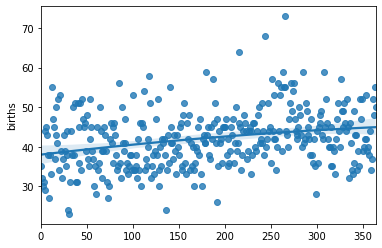

In [339]:
#Quadratic Trendline
sns.regplot(x=df2.index.values,y=df2['births'],order=2)

In [0]:
miles_df=pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv',header=0,parse_dates=[0])

In [341]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


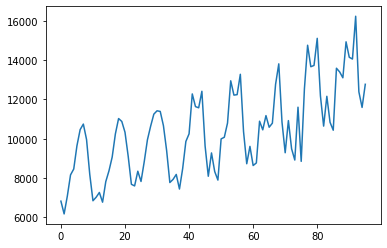

In [342]:
miles_df['MilesMM'].plot()

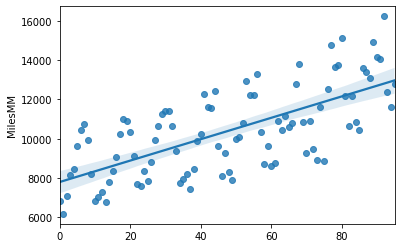

In [343]:
sns.regplot(x=miles_df.index.values,y=miles_df['MilesMM'])

##Removing Seasonality

In [0]:
miles_df['year']=miles_df['Month'].dt.year

In [345]:
miles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [0]:
yr=miles_df.groupby('year')

In [347]:
yr['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

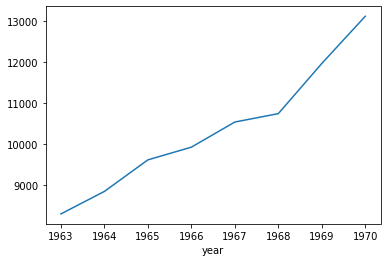

In [348]:
yr['MilesMM'].mean().plot()

Lag Plot

In [0]:
miles_df['lag1']=miles_df['MilesMM'].shift(1)

In [350]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


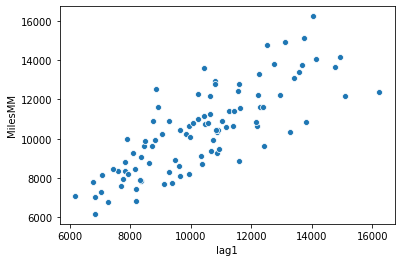

In [351]:
sns.scatterplot(x=miles_df['lag1'],y=miles_df['MilesMM'])

Using the direc lag_plot funtion for lag plot

In [0]:
from pandas.plotting import lag_plot

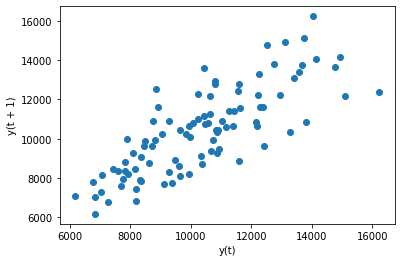

In [353]:
lag_plot(miles_df['MilesMM'])

Autocorrelation Plots

In [0]:
#To get correlation between lag values
from pandas.plotting import autocorrelation_plot

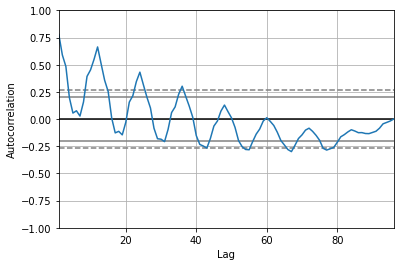

In [355]:
autocorrelation_plot(miles_df['MilesMM'])

##Feature Engineering

Date Time Features

In [356]:
df2.head(5)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [0]:
features=df2.copy()

In [358]:
features.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [0]:
features['year']=df2['date'].dt.year

In [360]:
features.head()

,date,births,year
0,1959-01-01,35,1959
1,1959-01-02,32,1959
2,1959-01-03,30,1959
3,1959-01-04,31,1959
4,1959-01-05,44,1959


In [0]:
features['month']=df2['date'].dt.month

In [0]:
features['day']=df2['date'].dt.day

In [363]:
features.head()

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


Lag Features

In [0]:
features['lag1']=df2['births'].shift(1)

In [365]:
features.head()

,date,births,year,month,day,lag1
0,1959-01-01,35,1959,1,1,NaN
1,1959-01-02,32,1959,1,2,35.0
2,1959-01-03,30,1959,1,3,32.0
3,1959-01-04,31,1959,1,4,30.0
4,1959-01-05,44,1959,1,5,31.0


In [0]:
features['lag2']=df2['births'].shift(365)

In [367]:
features.head()

,date,births,year,month,day,lag1,lag2
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN
3,1959-01-04,31,1959,1,4,30.0,NaN
4,1959-01-05,44,1959,1,5,31.0,NaN


Window Features

In [0]:
features['mean']=df2['births'].rolling(window = 2).mean()

In [369]:
features.head()

,date,births,year,month,day,lag1,lag2,mean
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5


In [0]:
features['max']=df2['births'].rolling(window = 3).max()

In [371]:
features.head()

,date,births,year,month,day,lag1,lag2,mean,max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0


Expanding Features

In [0]:
features['expand_max']=df2['births'].expanding().max()

In [373]:
features.head()

,date,births,year,month,day,lag1,lag2,mean,max,expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0,44.0


##Upsampling and Downsampling

In [374]:
miles_df=pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv',header=0,parse_dates=[0])
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


Downsampling

In [0]:
quarterly_miles_df=miles_df.resample('Q', on='Month').mean()

In [376]:
quarterly_miles_df.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [0]:
yearly_miles_df=miles_df.resample('A', on='Month').sum()

In [378]:
yearly_miles_df.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


Upsampling

In [0]:
Upsample_miles_df=miles_df.resample('D', on='Month').mean()

In [380]:
Upsample_miles_df.head(35)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


In [0]:
#To fill the values
Interpolated_miles_df=Upsample_miles_df.interpolate(method='linear')

In [382]:
Interpolated_miles_df.head(35)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


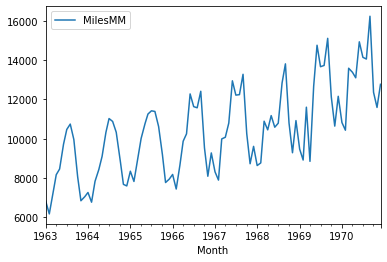

In [383]:
Interpolated_miles_df.plot()

In [0]:
#To get more smooth edges
poly_interpolated_miles_df=Upsample_miles_df.interpolate(method='spline',order=2)

In [385]:
poly_interpolated_miles_df.head(35)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6775.328886
1963-01-03,6725.739829
1963-01-04,6678.197709
1963-01-05,6632.702526
1963-01-06,6589.254280
1963-01-07,6547.852971
1963-01-08,6508.498600
1963-01-09,6471.191166


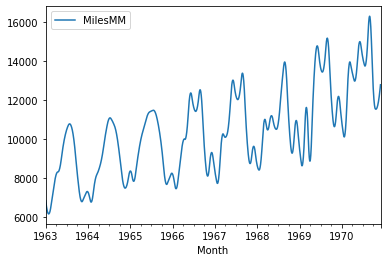

In [386]:
poly_interpolated_miles_df.plot()

#Decomposing Time Series

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [0]:
miles_decomp_df=miles_df.copy()

In [389]:
miles_decomp_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [0]:
miles_decomp_df.index=miles_decomp_df['Month']

In [391]:
miles_decomp_df.head()

,Month,MilesMM
Month,,
1963-01-01,1963-01-01,6827
1963-02-01,1963-02-01,6178
1963-03-01,1963-03-01,7084
1963-04-01,1963-04-01,8162
1963-05-01,1963-05-01,8462


Additive Model

y(t)= Level+Trend+Seasonality+Noise

In [0]:
result1=seasonal_decompose(miles_decomp_df['MilesMM'],model='additive')

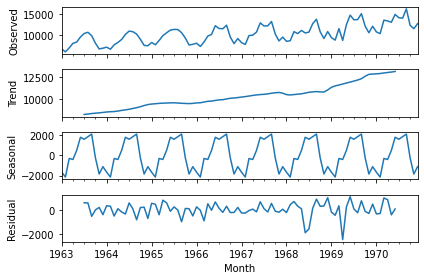

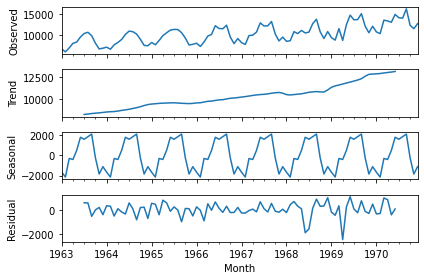

In [393]:
result1.plot()

Multiplicative Model

y(t)= Level* Trend * Seasonaility * Noise

In [0]:
result2=seasonal_decompose(miles_decomp_df['MilesMM'],model='multiplicative')

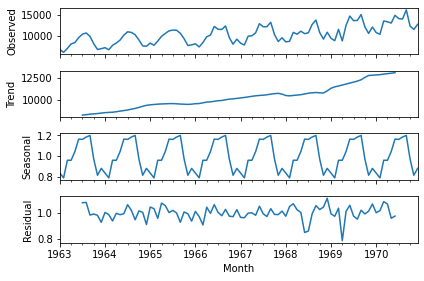

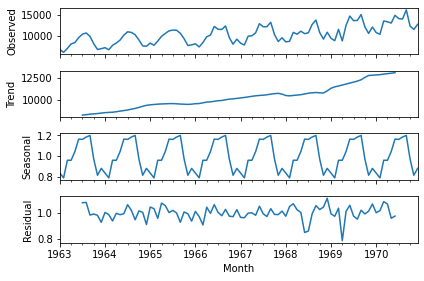

In [395]:
result2.plot()

##Differencing

In [0]:
miles_df['lag1']=miles_df['MilesMM'].shift(1)

In [397]:
miles_df.head()

,Month,MilesMM,lag1
0,1963-01-01,6827,NaN
1,1963-02-01,6178,6827.0
2,1963-03-01,7084,6178.0
3,1963-04-01,8162,7084.0
4,1963-05-01,8462,8162.0


In [0]:
miles_df['MilesMM_diff_1']=miles_df['MilesMM'].diff(periods=1)

In [399]:
miles_df.head()

,Month,MilesMM,lag1,MilesMM_diff_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


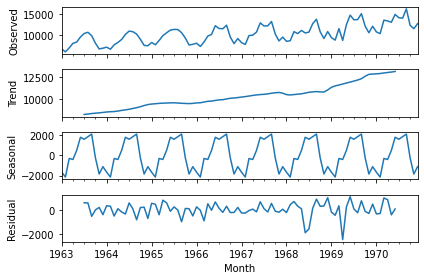

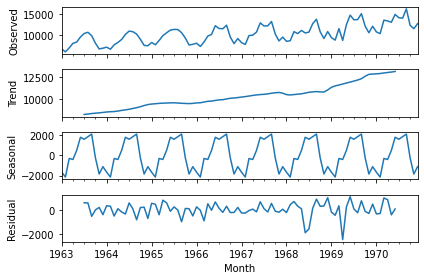

In [400]:
miles_df.index=miles_df['Month']
result_a=seasonal_decompose(miles_df['MilesMM'],model='additive')
result_a.plot()

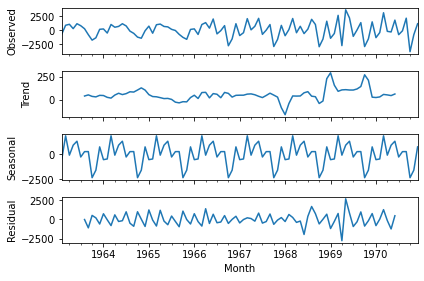

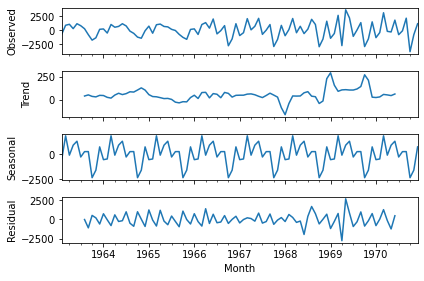

In [401]:
miles_df.index=miles_df['Month']
result_b=seasonal_decompose(miles_df.iloc[1:,3],model='additive')
result_b.plot()

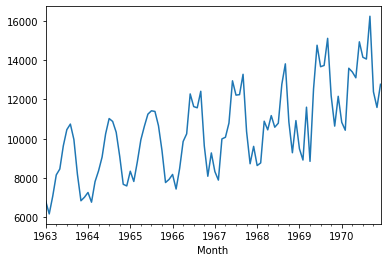

In [402]:
miles_df['MilesMM'].plot()

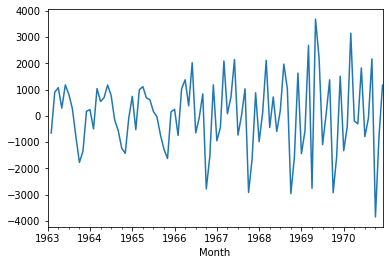

In [403]:
miles_df['MilesMM_diff_1'].plot()

In [0]:
#Removing Seasonality
miles_df['MilesMM_diff_12']=miles_df['MilesMM_diff_1'].diff(periods=12)

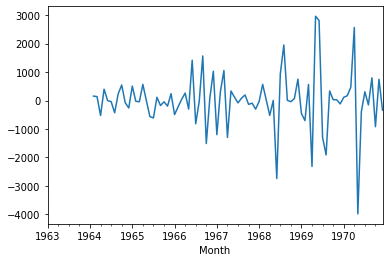

In [405]:
miles_df['MilesMM_diff_12'].plot()

In [406]:
miles_df.head(15)

,Month,MilesMM,lag1,MilesMM_diff_1,MilesMM_diff_12
Month,,,,,
1963-01-01,1963-01-01,6827,NaN,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0,NaN
1963-03-01,1963-03-01,7084,6178.0,906.0,NaN
1963-04-01,1963-04-01,8162,7084.0,1078.0,NaN
1963-05-01,1963-05-01,8462,8162.0,300.0,NaN
1963-06-01,1963-06-01,9644,8462.0,1182.0,NaN
1963-07-01,1963-07-01,10466,9644.0,822.0,NaN
1963-08-01,1963-08-01,10748,10466.0,282.0,NaN
1963-09-01,1963-09-01,9963,10748.0,-785.0,NaN


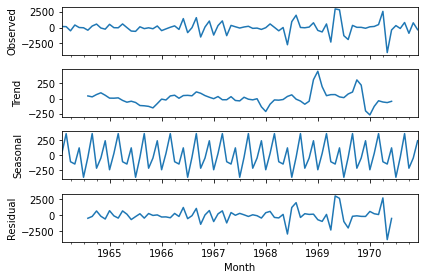

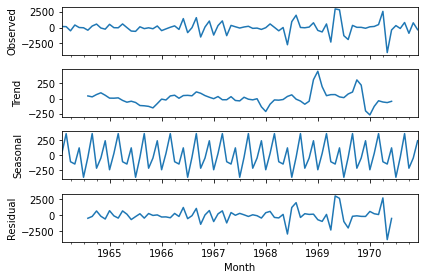

In [407]:
miles_df.index=miles_df['Month']
result_c=seasonal_decompose(miles_df.iloc[13:,4],model='additive')
result_c.plot()

#Test-Train Data

In [0]:
temp_df=pd.read_csv('daily-min-temperatures.csv',header=0,parse_dates=[0])

In [409]:
temp_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [410]:
temp_df.tail()

,Date,Temp
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


In [411]:
temp_df.shape

(3650, 2)

In [412]:
temp_df.shape[0]

3650

In [413]:
#Taking 80% of data in Training Part
train_size=int(temp_df.shape[0]*0.8)
train_size

2920

In [0]:
train=temp_df[0:train_size]
test=temp_df[train_size:]

In [415]:
train.shape

(2920, 2)

In [416]:
test.shape

(730, 2)

##Persistance Model or Naive Forcast Model

In [0]:
df=temp_df.copy()

In [418]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [419]:
df['t']=df['Temp'].shift(1)
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [0]:
train,test=df[1:df.shape[0]-7],df[df.shape[0]-7:]

In [421]:
train.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


In [0]:
train_x,train_y=train['t'],train['Temp']
test_x,test_y=test['t'],test['Temp']

Walk Fowrard Validation

In [0]:
pred=test_x.copy()

In [424]:
print(pred)
print(test_y)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [0]:
from sklearn.metrics import mean_squared_error

In [426]:
mse=mean_squared_error(test_y,pred)
mse

3.4228571428571413

In [0]:
from matplotlib import pyplot

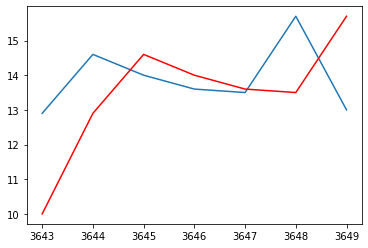

In [428]:
pyplot.plot(test_y)
pyplot.plot(pred,color='red')

#Auto Regression Model

In [0]:
df1=temp_df.copy()

In [430]:
df1.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [0]:
train,test=df1['Temp'][1:df1.shape[0]-7],df1['Temp'][df1.shape[0]-7:]

In [432]:
train.head()

1    17.9
2    18.8
3    14.6
4    15.8
5    15.8
Name: Temp, dtype: float64

In [0]:
from statsmodels.tsa.ar_model import AR

In [0]:
model=AR(train)
model_fit=model.fit()

No of lag variable

In [435]:
model_fit.k_ar
#This means we are concedring 29 lag variables for our model

29

Coefficient of Lag values

In [436]:
model_fit.params

const       0.557544
L1.Temp     0.588595
L2.Temp    -0.090826
L3.Temp     0.048262
L4.Temp     0.040065
L5.Temp     0.039302
L6.Temp     0.025946
L7.Temp     0.044668
L8.Temp     0.012768
L9.Temp     0.037436
L10.Temp   -0.000812
L11.Temp    0.004791
L12.Temp    0.018473
L13.Temp    0.026891
L14.Temp    0.000576
L15.Temp    0.024810
L16.Temp    0.007403
L17.Temp    0.009916
L18.Temp    0.034160
L19.Temp   -0.009120
L20.Temp    0.024213
L21.Temp    0.018787
L22.Temp    0.012184
L23.Temp   -0.018553
L24.Temp   -0.001772
L25.Temp    0.016732
L26.Temp    0.019762
L27.Temp    0.009832
L28.Temp    0.006227
L29.Temp   -0.001377
dtype: float64

In [0]:
prediction=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

In [438]:
prediction

3643    11.871275
3644    13.053794
3645    13.532591
3646    13.243126
3647    13.091438
3648    13.146989
3649    13.176153
dtype: float64

In [439]:
#First Forcasted value
prediction.iloc[0]

11.87127484772784

In [440]:
mse1=mean_squared_error(test_y,prediction)
mse1
#We get less MSE by AR model so it is not a random walk

1.501525231006946

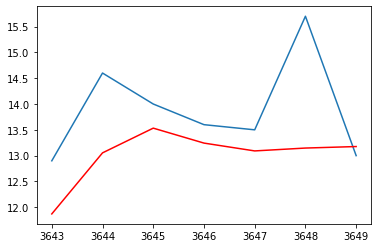

In [441]:
pyplot.plot(test_y)
pyplot.plot(prediction,color='red')

Walk Forward Validation

In [442]:
df1.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [0]:
train,test=df1['Temp'][1:df1.shape[0]-7],df1['Temp'][df1.shape[0]-7:]

In [444]:
import numpy as np
data=train
predict=[]
for t in test:
  model=AR(data)
  model_fit=model.fit()
  y=model_fit.predict(start=len(data),end=len(train)+ len(test)-1)
  print(y.values[0])
  predict.append(y.values[0])
  data=np.append(data,t)
  data=pd.Series(data)

11.87127484772784
13.660699943835198
14.353164144090167
13.430120791627
13.374756477185125
13.479111299420508
14.76777301843986


In [445]:
mse2=mean_squared_error(test.values,predict)
mse2
#Furthur MSE reduction

1.4524568425185247

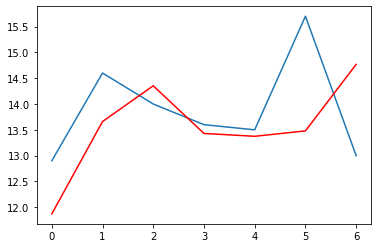

In [446]:
pyplot.plot(test.values)
pyplot.plot(predict,color='red')

##Moving Model Forecast

First we find the residual values using Naive Method

In [447]:
df1.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [0]:
df1['t']=df1['Temp'].shift(1)

In [0]:
df1['Residual']=df1['Temp']-df1['t']

In [450]:
df1.head()

,Date,Temp,t,Residual
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2


In [0]:
train,test=df1['Residual'][1:df1.shape[0]-7],df1['Residual'][df1.shape[0]-7:]

In [452]:
train.head()

1   -2.8
2    0.9
3   -4.2
4    1.2
5    0.0
Name: Residual, dtype: float64

In [0]:
from statsmodels.tsa.ar_model import AR

In [0]:
model= AR(train)
model_fit=model.fit()

In [455]:
model_fit.k_ar

29

In [456]:
model_fit.params

const          -0.006415
L1.Residual    -0.407139
L2.Residual    -0.496194
L3.Residual    -0.445747
L4.Residual    -0.403706
L5.Residual    -0.362528
L6.Residual    -0.334810
L7.Residual    -0.288468
L8.Residual    -0.274281
L9.Residual    -0.235333
L10.Residual   -0.234799
L11.Residual   -0.228532
L12.Residual   -0.208608
L13.Residual   -0.180324
L14.Residual   -0.178425
L15.Residual   -0.152265
L16.Residual   -0.143617
L17.Residual   -0.132501
L18.Residual   -0.097075
L19.Residual   -0.104927
L20.Residual   -0.079371
L21.Residual   -0.059348
L22.Residual   -0.045921
L23.Residual   -0.063197
L24.Residual   -0.063441
L25.Residual   -0.045061
L26.Residual   -0.023578
L27.Residual   -0.011882
L28.Residual   -0.003789
L29.Residual   -0.003422
dtype: float64

In [0]:
pred_Residual=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

In [458]:
pred_Residual

3643    2.004986
3644    1.264192
3645    0.510869
3646   -0.251687
3647   -0.122054
3648    0.077509
3649    0.055600
dtype: float64

In [0]:
predictions=df1['t'][df1.shape[0]-7:]+pred_Residual

In [460]:
predictions

3643    12.004986
3644    14.164192
3645    15.110869
3646    13.748313
3647    13.477946
3648    13.577509
3649    15.755600
dtype: float64

In [461]:
mse=mean_squared_error(test_y,predictions)
mse

2.049398556648208

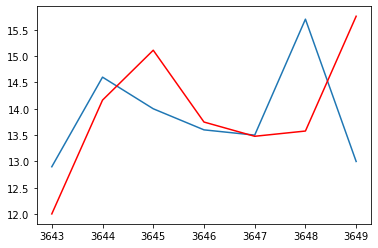

In [462]:
pyplot.plot(test_y)
pyplot.plot(predictions,color='red')

#ARMIA

In [0]:
df=pd.read_csv("shampoo.csv",header=0,parse_dates=[0])

In [464]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


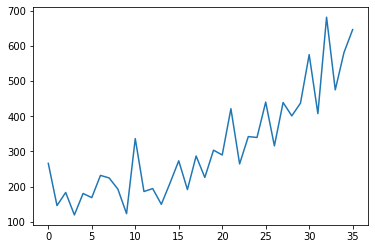

In [465]:
df['Sales'].plot()

*Since our data has data has quadratic trend so we will use*

D=2

**AUTO CORRELATION**

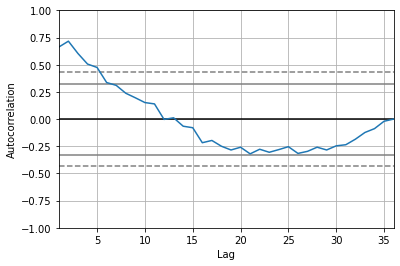

In [466]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])

*We Will Select* 

P=5

*As the plot crosses the Confidence Interval Line at 5*

In [0]:
from statsmodels.graphics.tsaplots import plot_pacf

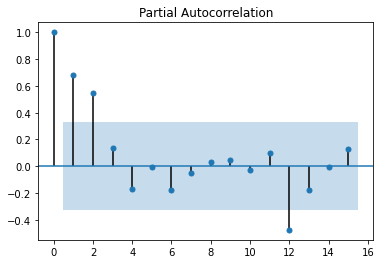

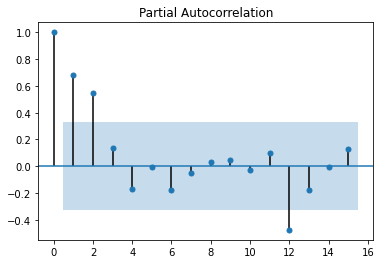

In [469]:
plot_pacf(df['Sales'],lags=15)

*Since the Graph is crossing the value berween 2 and 3 so*

Q=2

In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [0]:
model=ARIMA(df['Sales'],order=(5,2,2))

#Tuple is the value of P D and Q

In [475]:
model_fit=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: Converge

In [476]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Sales   No. Observations:                   34
Model:                 ARIMA(5, 2, 2)   Log Likelihood                -189.034
Method:                       css-mle   S.D. of innovations             54.352
Date:                Sat, 25 Apr 2020   AIC                            396.067
Time:                        04:53:02   BIC                            409.805
Sample:                             2   HQIC                           400.752
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9167      0.256      3.575      0.001       0.414       1.419
ar.L1.D2.Sales    -2.1874      0.184    -11.888      0.000      -2.548      -1.827
ar.L2.D2.Sales    -2.1233      0.405     -5.246      0.000      -2.916      -1.330
ar.L3.D2.Sales    -1.6014      0.478     -3.353      0.002      -2.538      -0.665
ar.L4.D2.Sales    -1.0318      0.409     -2.520      0.018      -1.834      -0.229
ar.L5.D2.Sales    -0.3194      0.193     -1.654      0.110      -0.698       0.059
ma.L1.D2.Sales    -0.0006      0.120     -0.005      0.996      -0.235       0.234
ma.L2.D2.Sales    -0.9994      0.119     -8.365      0.000      -1.234      -0.765
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.1409           -1.3030j            1.3106           -0.2329
AR.2            0.1409           +1.3030j            1.3106            0.2329
AR.3           -1.1312           -0.4226j            1.2076           -0.4431
AR.4           -1.1312           +0.4226j            1.2076            0.4431
AR.5           -1.2499           -0.0000j            1.2499           -0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0006           +0.0000j            1.0006            0.5000
-----------------------------------------------------------------------------
"""

*Lesser the P value more important is the variable*

In [0]:
residual=model_fit.resid

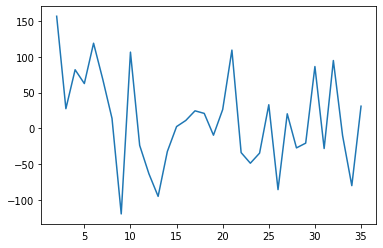

In [478]:
residual.plot()

*Our residual does not show any trend or seasonality and acts as white noise*